In [1]:
# !pip install pygame

In [1]:
import librosa
import numpy as np
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.9.15)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [28]:
images = [pygame.image.load(f'./Bars/{i+1}.png') for i in range(8)]

screenH = 630
screenW = 450

NewImage = []

for image in images:

    NewImage.append(pygame.transform.scale(image,(screenW,screenH)))


In [3]:
# Load the audio file
y, sr = librosa.load('sample.mp3')

In [4]:
len(y)/sr 

128.0

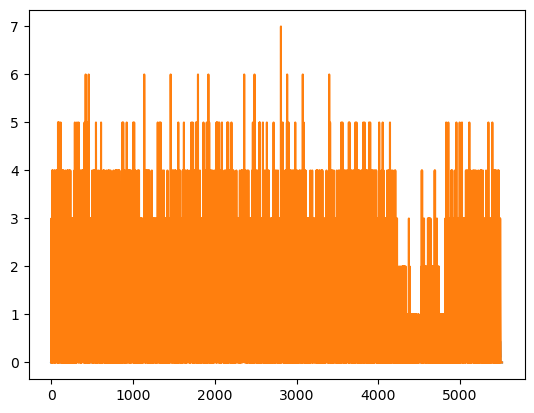

In [5]:
import matplotlib.pyplot as plt
# Calculate the RMS values
rms = librosa.feature.rms(y=y, frame_length=1)[0]
plt.plot(rms)

binned_rms = np.digitize(rms, np.linspace(rms.min(), rms.max(), 8)) - 1
plt.plot(binned_rms)

# print(len(rms))
# plt.xlim(0,30)

In [6]:
import numpy as np

def slow_decay(waveform, window_size=100):
    filter_weights = np.ones(window_size) / window_size
    smoothed_waveform = np.convolve(waveform, filter_weights, mode='same')
    return smoothed_waveform



dtype('int64')

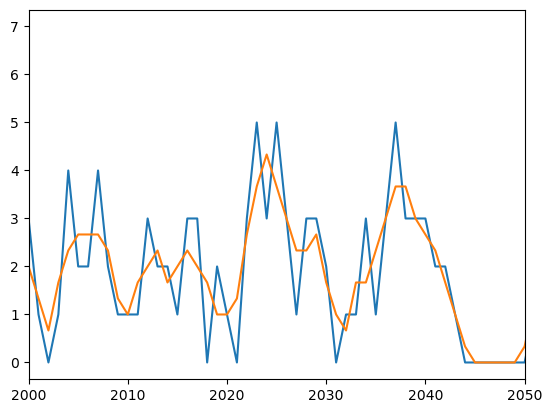

In [7]:
# Manipulate the display

plt.plot(binned_rms)
plt.xlim(2000,2050)

plt.plot(slow_decay(binned_rms, window_size = 3))
plt.xlim(2000,2050)

binned_rms = slow_decay(binned_rms, window_size = 3).astype(int)

binned_rms.dtype


In [8]:
len(binned_rms)

5513

In [9]:
timearr = np.linspace(0,len(y)/sr,len(binned_rms))

In [10]:
len(NewImage)

8

In [11]:
# Sinosidual Easing



def easing(i,length):
    
    xarr = np.arange(length)
    yarr = (xarr / np.max(xarr))**(1/3)
    
    return yarr[i]

In [ ]:
import time

import librosa
import pygame
import numpy as np

ImTrain = []
# Load the audio file using librosa
y, sr = librosa.load("sample.mp3")

# Detect the beats using librosa
tempo, beat_frames = librosa.beat.beat_track(y = y, sr=sr, units = "time")

# Calculate the loudness levels of each beat

rms = librosa.feature.rms(y=y, frame_length=1)[0]

binned_rms = np.digitize(rms, np.linspace(rms.min(), rms.max(), 8)) - 1

# Load the images
images = [pygame.image.load(f'./Bars/{1+i}.jpg') for i in range(8)]


    

# Initialize pygame
pygame.init()

# Set the screen size
screen = pygame.display.set_mode((screenW,screenH))

# Load and play the music
pygame.mixer.music.load("sample.mp3")


time.sleep(10)
pygame.mixer.music.play()

# Create a clock to control the frame rate
clock = pygame.time.Clock()

# Run the game loop
running = True
beat_index = 0


# set the pygame window name
pygame.display.set_caption('850 Estate Sound Meter')
 
# create a font object.
# 1st parameter is the font file
# which is present in pygame.
# 2nd parameter is size of the font
font = pygame.font.Font(pygame.font.match_font("Fira Code"), 12)
 
# create a text surface object,
# on which text is drawn on it.

white = (255, 255, 255)
black = (0, 0, 0)

base = pygame.image.load(f'./Bars/0.jpg')
base = pygame.transform.scale(base,(screenW,screenH))

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Clear the screen
    screen.fill(white)
    

    screen.blit(base, (0, 0))
    

    # Get the current time
    time = pygame.mixer.music.get_pos() / 1000

    # Evaluate the Next Loudness
    
    
    try:
        Index = np.flatnonzero(timearr < time)[-1]
    except:
        Index = 0

    
    # Choose the appropriate image
    #image = NewImage[binned_rms[Index]]

    # Draw the image
    #screen.blit(image, (0, 0))
    
    ImTrainLen = 6 # Keep a few frames in memory
    # Draw the previous images
    
    ImTrain.append(binned_rms[Index])
    
    if len(ImTrain) > ImTrainLen:
        ImTrain.pop(0)
        
    for i,Passenger in enumerate(reversed(ImTrain)):
        
        image = NewImage[Passenger].copy()
        
        alpha = int(255 * easing(ImTrainLen-i-1,ImTrainLen))
        #print(alpha)
        image.set_alpha(alpha)
        screen.blit(image, (0, 0))
        
    
    text = font.render(f'Time: {time}, Frame: {Index}', True, white, black)
    screen.blit(text, (0,0))
    

    # Update the screen
    pygame.display.update()
    #print("="*20)

    clock.tick(20)

# Quit pygame
pygame.quit()

In [ ]:
pygame.font.match_font("Avenir")

In [ ]:
# importing required library
import pygame
 
# activate the pygame library .
pygame.init()
X = 600
Y = 600
 
# create the display surface object
# of specific dimension..e(X, Y).
scrn = pygame.display.set_mode((screenW,screenH))
 
# set the pygame window name
pygame.display.set_caption('image')
 
# create a surface object, image is drawn on it.
imp = NewImage[0]
 
# Using blit to copy content from one surface to other
scrn.blit(imp, (0, 0))
 
# paint screen one time
pygame.display.flip()
status = True
while (status):
 
  # iterate over the list of Event objects
  # that was returned by pygame.event.get() method.
    for i in pygame.event.get():
 
        # if event object type is QUIT
        # then quitting the pygame
        # and program both.
        if i.type == pygame.QUIT:
            status = False

pygame.quit()

In [13]:
List = [1,2,3,4]

for i, a in enumerate(List):
    print(i)

0
1
2
3


In [16]:
for i, a in enumerate(reversed(List)):
    
    print(i,a)

0 4
1 3
2 2
3 1
